In [1]:
import os
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install split-folders

# **Loading dataset**

In [3]:
df = '/kaggle/input/blood-cells-image-dataset/bloodcells_dataset'

In [4]:
# normalization
datagen = ImageDataGenerator(rescale=1./255)

# Load dataset
data_generator = datagen.flow_from_directory(
    df,                
    target_size=(200, 200),   
    batch_size=32,           
    class_mode='categorical'  
)

Found 17092 images belonging to 8 classes.


# ***Data Exploration***

## Data Distribution

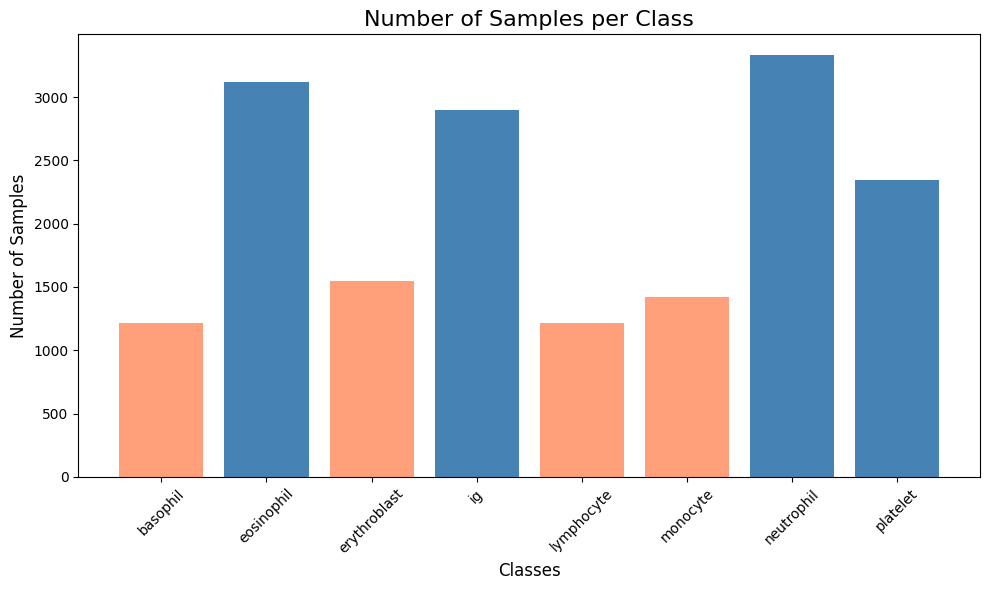

In [5]:
# Show number of samples in each class
class_counts = {class_name: len(os.listdir(os.path.join(df, class_name))) 
                for class_name in data_generator.class_indices.keys()}

# Extracting class names and their corresponding counts
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Plotting the bar chart with automatic class names
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color=['#FFA07A', '#4682B4', '#FFA07A', '#4682B4', '#FFA07A', '#FFA07A', '#4682B4', '#4682B4'])
plt.title('Number of Samples per Class', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Checking for imbalance classes

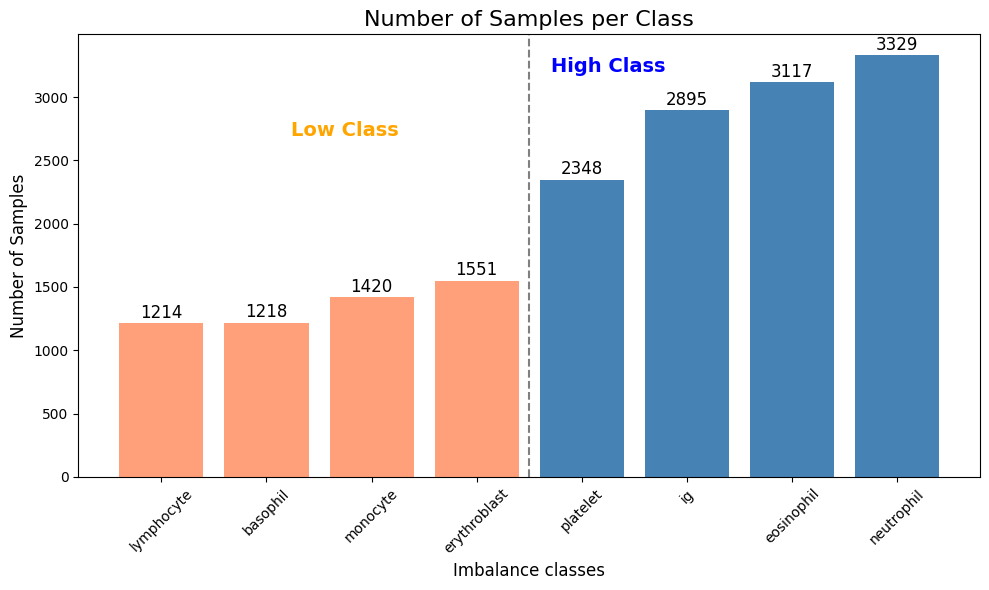

In [6]:
# Show number of samples in each class
class_counts = {class_name: len(os.listdir(os.path.join(df, class_name))) 
                for class_name in data_generator.class_indices.keys()}

# Sorting the class_counts dictionary by the values (number of samples) in ascending order
sorted_class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1]))

# Extracting sorted class names and their corresponding counts
classes = list(sorted_class_counts.keys())
counts = list(sorted_class_counts.values())

# Define colors for low and high class groups
low_class_color = '#FFA07A'  # Light salmon color for low class
high_class_color = '#4682B4'  # Steel blue color for high class

# Color the bars based on the class group (first 4 as low class, next 4 as high class)
colors = [low_class_color] * 4 + [high_class_color] * 4

# Plotting the bar chart with colored class groups
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, counts, color=colors)
plt.title('Number of Samples per Class', fontsize=16)
plt.xlabel('Imbalance classes', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)

# Adding a line to separate low and high classes
plt.axvline(x=3.5, color='gray', linestyle='--', linewidth=1.5)

# Labeling the groups with better positioning
plt.text(1.75, max(counts) * 0.8, 'Low Class', ha='center', va='bottom', fontsize=14, color='orange', weight='bold')
plt.text(4.25, max(counts) * 0.95, 'High Class', ha='center', va='bottom', fontsize=14, color='blue', weight='bold')

# Adding numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


## Train and Test Data Spliting
4. Split the data into training,validation and testing with ratio of (70:10:20) and make a separate folder for each.

In [7]:
"""

import splitfolders

input_data = '/kaggle/input/blood-cells-image-dataset/bloodcells_dataset'
output_data = '/kaggle/working/split_data'
#train:val:test
splitfolders.ratio(input_data, output=output_data, seed=42, ratio=(0.7,0.1,0.2), group_prefix=None)

import shutil

# Create a zip file of the directory
shutil.make_archive('/kaggle/working/split_data', 'zip', '/kaggle/working/split_data')

"""

"\n\nimport splitfolders\n\ninput_data = '/kaggle/input/blood-cells-image-dataset/bloodcells_dataset'\noutput_data = '/kaggle/working/split_data'\n#train:val:test\nsplitfolders.ratio(input_data, output=output_data, seed=42, ratio=(0.7,0.1,0.2), group_prefix=None)\n\nimport shutil\n\n# Create a zip file of the directory\nshutil.make_archive('/kaggle/working/split_data', 'zip', '/kaggle/working/split_data')\n\n"

In [8]:
data_folders = {
    'train': '/kaggle/input/blood-cell-classification-dataset/train',
    'val': '/kaggle/input/blood-cell-classification-dataset/val',
    'test': '/kaggle/input/blood-cell-classification-dataset/test'
}

# Function to count images per class in a folder
def count_images_per_class(folder_path):
    return {class_name: len(os.listdir(os.path.join(folder_path, class_name))) 
            for class_name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, class_name))}

# Collect data counts for visualization
data_counts = {split_name: count_images_per_class(folder_path) for split_name, folder_path in data_folders.items()}

# Prepare data for plotting
all_classes = sorted(set(class_name for counts in data_counts.values() for class_name in counts.keys()))
num_classes = len(all_classes)
bar_data = np.zeros((num_classes, len(data_counts)))

for i, split_name in enumerate(data_counts.keys()):
    for j, class_name in enumerate(all_classes):
        bar_data[j, i] = data_counts[split_name].get(class_name, 0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.2
index = np.arange(num_classes)

for i, split_name in enumerate(data_counts.keys()):
    bars = ax.bar(index + i * bar_width, bar_data[:, i], bar_width, label=split_name.capitalize())
    # Add text annotations for each bar
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

# Labeling the plot
ax.set_xlabel("Classes")
ax.set_ylabel("Number of Images")
ax.set_title("Image Count per Class Across Different Splits")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(all_classes, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

## **Data Visiualization**

In [ ]:
# Show sample images for each class
def show_sample_images(data_generator, num_samples=4):
    class_names = data_generator.class_indices.keys()
    
    plt.figure(figsize=(13, 25))
    
    for i, class_name in enumerate(class_names):
        # Get sample images from the class directory
        class_dir = os.path.join(data_generator.directory, class_name)
        sample_images = os.listdir(class_dir)[:num_samples]
        
        for j, image_name in enumerate(sample_images):
            image_path = os.path.join(class_dir, image_name)
            img = mpimg.imread(image_path)
            
            # Create a subplot for each image
            plt.subplot(len(class_names), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')  # Turn off axis
            plt.title(class_name)  # Title for each class

    plt.tight_layout()
    plt.show()

# Call the function to display sample images
show_sample_images(data_generator)


## Reduceing the image size and channel

2.	Reduce the image size as input 360 x 363 jpg to 128 x 128
3.	Convert RGB into grey scaled image to reduce the depth and computation


## Check the overlaping of the classes

In [ ]:
import os

def find_overlapping_images(data_folders):
    image_classes = {}  # Dictionary to hold images for each class
    overlapping_images = {}  # Dictionary to hold overlapping images

    # Iterate through each folder and collect image file names
    for split_name, folder_path in data_folders.items():
        for class_name in os.listdir(folder_path):
            class_path = os.path.join(folder_path, class_name)
            if os.path.isdir(class_path):
                # Collect images for the class
                images = os.listdir(class_path)
                if class_name not in image_classes:
                    image_classes[class_name] = set()
                
                for image in images:
                    image_classes[class_name].add(image)

    # Check for overlaps
    seen_images = set()  # To track all seen images
    for class_name, images in image_classes.items():
        for image in images:
            if image in seen_images:
                # If the image is already seen, add to overlapping_images
                if image not in overlapping_images:
                    overlapping_images[image] = []
                overlapping_images[image].append(class_name)
            else:
                seen_images.add(image)  # Add the image to seen images

    return overlapping_images

# Example usage:
data_folders = {
    'train': '/kaggle/input/blood-cell-classification-dataset/train',
    'val': '/kaggle/input/blood-cell-classification-dataset/val',
    'test': '/kaggle/input/blood-cell-classification-dataset/test'
}

overlapping_images = find_overlapping_images(data_folders)

# Display results
if overlapping_images:
    print("Overlapping Images and Their Classes:")
    for image, classes in overlapping_images.items():
        print(f"{image}: {', '.join(classes)}")
else:
    print("No overlapping images found.")


## Making a flow (Pipeline)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator with normalization
image_gen = ImageDataGenerator(rescale=1./255)

# Load training dataset
train = image_gen.flow_from_directory(
    '/kaggle/input/blood-cell-classification-dataset/train',
    target_size=(200, 200),
    color_mode='rgb',
    batch_size=8,
    class_mode='categorical'
)

# Load validation dataset
val = image_gen.flow_from_directory(
    '/kaggle/input/blood-cell-classification-dataset/val',
    target_size=(200, 200),
    color_mode='rgb',
    batch_size=8,
    class_mode='categorical'
)

# Load testing dataset
test = image_gen.flow_from_directory(
    '/kaggle/input/blood-cell-classification-dataset/test',
    target_size=(200, 200),
    color_mode='rgb',
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

In [ ]:
train_img.class_indices

# **Building The Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(200,200,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(200,200,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(200,200,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

# Last layer, remember its categorical
model.add(Dense(8))
model.add(Activation('softmax'))



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

# Training the Model

In [ ]:
history = model.fit(train,epochs=2,validation_data=val ,verbose=1)

In [ ]:
test_loss, test_accuracy = model.evaluate(test, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

In [ ]:
history.history['accuracy']

# Ploting Model Acurracy and Loss

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_test = test.labels # set y_test to the expected output
print(classification_report(y_test, pred))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred)*100))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_labels = ['basophil','eosinophil','erythroblast','ig','lymphocyte','monocyte','neutrophil','platelet']

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")
plt.show()


# Save the model

In [ ]:
#model.save('Bloodcell_basicModel.h5')

# Find best CNN model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import os

# Define a function to create the model
def create_model(optimizer='adam', filters=32, kernel_size=(3, 3), dropout_rate=0.5):
    model = Sequential()
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, input_shape=(200, 200, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))  # Dropout layer

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))  # Dropout layer

    model.add(Dense(8, activation='softmax'))  # Output layer for 8 classes

    # Compile the model with the specified optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=0.0001)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=0.01, momentum=0.9)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=0.001)
    else:
        raise ValueError("Optimizer not recognized")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter grid to search
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'filters': [32, 64],
    'kernel_size': [(3, 3), (5, 5)],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [16, 32],
    'epochs': [10]
}

# Create a list to store the results
results = []

# Create a directory to save the models
os.makedirs('saved_models', exist_ok=True)

# Iterate over all combinations of hyperparameters
for params in ParameterGrid(param_grid):
    print(f"Training with params: {params}")
    
    # Create the model with the current parameters
    model = create_model(optimizer=params['optimizer'],
                         filters=params['filters'],
                         kernel_size=params['kernel_size'],
                         dropout_rate=params['dropout_rate'])
    
    # Fit the model and store the history
    history = model.fit(train_img,
                        steps_per_epoch=len(train_img),
                        validation_data=val_img,
                        validation_steps=len(val_img),
                        epochs=params['epochs'],
                        verbose=0)  # Verbose set to 0 for cleaner output
    
    # Save the model with a name reflecting its hyperparameters
    model_name = f"model_optimizer_{params['optimizer']}_filters_{params['filters']}_kernel_{params['kernel_size']}_dropout_{params['dropout_rate']}.h5"
    model_path = os.path.join('saved_models', model_name)
    model.save(model_path)
    print(f"Model saved as: {model_path}")
    
    # Store the results along with parameters and history
    results.append({
        'params': params,
        'history': history.history
    })

# Plot the results for each parameter combination
for result in results:
    params = result['params']
    history = result['history']
    
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Model Accuracy\nOptimizer: {params['optimizer']}, Filters: {params['filters']}, Dropout: {params['dropout_rate']}")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f"Model Loss\nOptimizer: {params['optimizer']}, Filters: {params['filters']}, Dropout: {params['dropout_rate']}")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


# Predicting on new images

# **Transfor Learning**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define directories for train and test data
train_dir = '/kaggle/input/cats-and-dogs-images-dataset/CATS_DOGS/CATS_DOGS/train'
test_dir = '/kaggle/input/cats-and-dogs-images-dataset/CATS_DOGS/CATS_DOGS/test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 16

# Create data generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
# for layer in base_model.layers[20]: means freeze all the layers before 20 and unfreeze after 20th layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new sequential model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Flatten the output of the VGG16 base model
model.add(Flatten())

# Add custom top layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define directories for train, validation, and test data
train_dir = '/kaggle/input/blood-cell-classification-dataset/train'
val_dir = '/kaggle/input/blood-cell-classification-dataset/val'  # Validation directory
test_dir = '/kaggle/input/blood-cell-classification-dataset/test'

# Define image dimensions and batch size
img_width, img_height = 200, 200
batch_size = 16

# Create data generators for train, validation, and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)  # Validation data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training dataset
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')  

# Load the validation dataset
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size,
                                                class_mode='categorical')  
# Load the testing dataset
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',  
                                                  shuffle=False)

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new sequential model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Flatten the output of the VGG16 base model
model.add(Flatten())

# Add custom top layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Output layer for 8 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # Loss for multi-class
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)


In [ ]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))